<a href="https://colab.research.google.com/github/jainam2718/120_JainamShah/blob/master/Lab04_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")
# importing libraries
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB, MultinomialNB

Mounted at /content/drive


In [12]:
dataset = pd.read_csv('/content/drive/MyDrive/ML_Labs/L3/PracticeDataSets/Dataset3.csv')

#encode
encoded_dataset = dataset
Y_rows = label_encoder.fit_transform(dataset['Class'])
encoded_dataset.drop(['Class'],axis=1,inplace=True)
for data_heading in dataset:
  dummies = pd.get_dummies(dataset[data_heading])
  encoded_dataset = pd.concat([encoded_dataset,dummies],axis='columns')
  encoded_dataset = encoded_dataset.drop([data_heading],axis='columns')


print(dataset)
print("\nAfter Transformaing data\n")
print(encoded_dataset)

   Outlook Temp Wind  Humidity
0        R    H    F         1
1        R    H    T         2
2        O    H    F         1
3        R    M    F         1
4        S    C    F         1
5        O    C    T         0
6        O    C    T         1
7        R    M    F         1
8        O    C    F         0
9        S    M    F         2
10       R    C    T         2
11       O    M    T         0
12       O    H    F         1
13       S    M    T         1

After Transformaing data

    O  R  S  C  H  M  F  T  0  1  2
0   0  1  0  0  1  0  1  0  0  1  0
1   0  1  0  0  1  0  0  1  0  0  1
2   1  0  0  0  1  0  1  0  0  1  0
3   0  1  0  0  0  1  1  0  0  1  0
4   0  0  1  1  0  0  1  0  0  1  0
5   1  0  0  1  0  0  0  1  1  0  0
6   1  0  0  1  0  0  0  1  0  1  0
7   0  1  0  0  0  1  1  0  0  1  0
8   1  0  0  1  0  0  1  0  1  0  0
9   0  0  1  0  0  1  1  0  0  0  1
10  0  1  0  1  0  0  0  1  0  0  1
11  1  0  0  0  0  1  0  1  1  0  0
12  1  0  0  0  1  0  1  0  0  1  0
13  

In [21]:
# train test division 85% - 15%
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
X_train, X_test, Y_train, Y_test = train_test_split(encoded_dataset, Y_rows, test_size = 0.15, random_state = 120)


# Create a decisionTreeCalssifier object
dtc = DecisionTreeClassifier(criterion = "gini")
dtc.fit(X_train, Y_train)
Y_predicted = dtc.predict(X_test)

print(Y_predicted)

[1 1 1]


In [22]:
from sklearn import metrics

print(f"Accuracy is :- {metrics.accuracy_score(Y_test, Y_predicted)}")

Accuracy is :- 0.3333333333333333


Confusion matrix:
[[0 2]
 [0 1]]


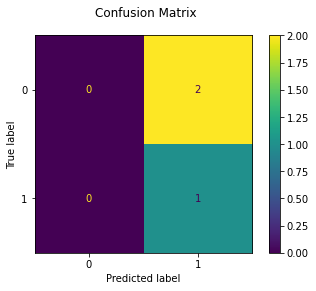

In [23]:
disp = metrics.plot_confusion_matrix(dtc, X_test, Y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()


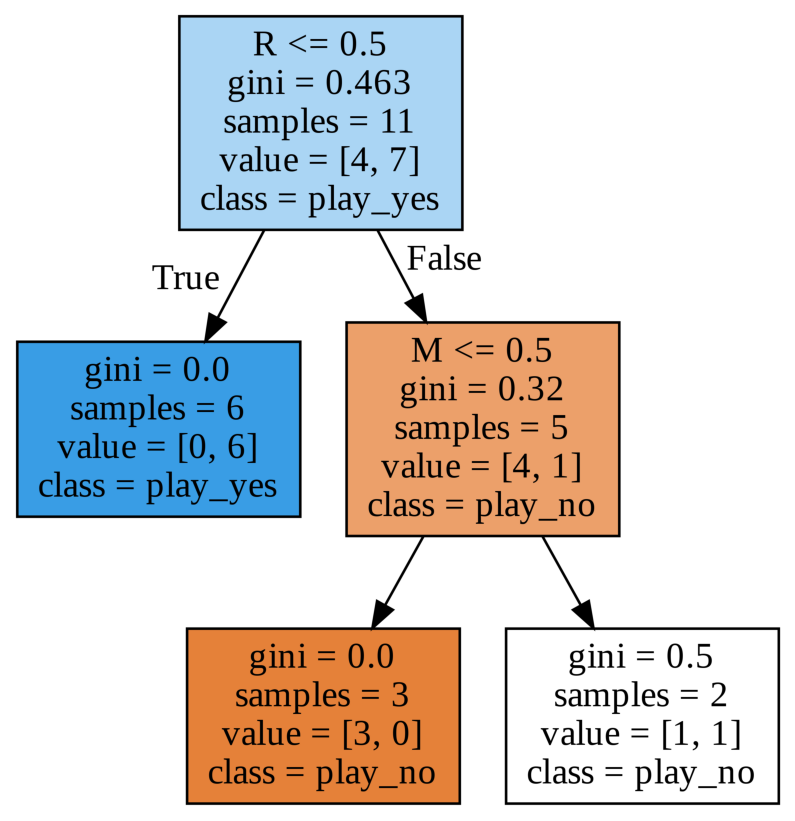

In [24]:
import tkinter

from sklearn.tree import export_graphviz
export_graphviz(dtc, out_file='tree_gini.dot',feature_names=['O', 'R', 'S', 'C','H', 'M' ,'F', 'T', '0', '1', '2'],class_names=['play_no','play_yes'],filled=True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree_gini.dot', '-o', 'tree_gini.png', '-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_gini.png'))
plt.axis('off')
plt.show()